In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from stepwise_regression.step_reg import *
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

### Question Three - Diabetes Data

In this assignment we will be looking at data analyzing diabetes patients (N = 442). The data consists of 11 columns. These columns are AGE, SEX, BMI (body mass index), BP (average blood pressure), S1, S2, S3, S4, S5, S6 (the last six are blood serum measurements looking for example at the Glucose level in blood). The 11th column is the dependent variable y, a quantitative measure of disease progression 1 year after baseline (one year after incurring the disease).

**3.1.** Load the diabetes data into MATLAB or Python from here. Produce a correlation matrix of the explanatory variables. Make a heat-map of the matrix (using imagesc and colorbar) and describe the relationships between the variables.

<Axes: >

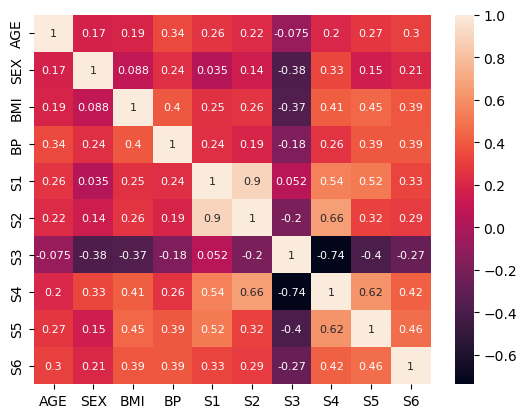

In [406]:
#Load the diabetes data from the excel sheet
diabetes_data = pd.read_excel('Diabetes_Data.xlsx')
# Select the predictor variables
predictor_df = diabetes_data.drop(["Y"], axis=1).copy()
# Get the correlation between the predictor variables
correlation_matrix = predictor_df.corr()
# Plot the heatmap
sns.heatmap(correlation_matrix, annot = True, annot_kws={"size": 8})

We observe a high correlation of 0.74 between the predictor variables S3 and S4 which might indicate collinearity. There is also a significant correlation between S3 and BMI, S3 and Sex, and S5 and S3. Other predictor variables have a low correlation with each other.

**3.2. What is collinearity? What effect does collinearity amongst predictor variables have on their estimated coefficient value?**

Collinearity is an event in which a predictor variable has a strong relationship with one or more other predictor variables. 

Because a linear regression model is meant identify the relationship between a predictor variable and the dependent variable, colliearity introduces a problem where one a change in one predictor variable causes a change in another predictor variable. This makes it difficult for the model to estimate the relationship between the predictor and predicted variables.

Therefore, the coeffecient estimates of the regression model may change significatly due to a small change in one predictor variable, as thee effect is carried over to the its collinear variables

**3.3.Create a multivariate linear model using all ten variables and a constant. In the rest of this assignment this model will be referred to as model1. What are the Mean Squared Error and the adjusted R2 for model1? Are all variables significant? Could this be a problem of collinearity?** 

In [4]:
# Set the X and Y values
diabetes_X = predictor_df
diabetes_y = pd.DataFrame(diabetes_data["Y"])

In [5]:
# Create the linear regression model
model1 = linear_model.LinearRegression()
model1.fit(diabetes_X, diabetes_y)

LinearRegression()

In [6]:
# Predict the Y values based on the model
diabetes_y["Y Pred"] = model1.predict(diabetes_X)
diabetes_y.head()

,Y,Y Pred
0,151,206.116677
1,75,68.071033
2,141,176.882790
3,206,166.914458
4,135,128.462258


In [7]:
# Find the mean squared error and R2 score
mse = mean_squared_error(diabetes_y["Y"], diabetes_y["Y Pred"])
r2 = r2_score(diabetes_y["Y"], diabetes_y["Y Pred"])

print(f"Mean Squared Error : {round(mse, 4)}")
print(f"R2 score : {round(r2, 4)}")

Mean Squared Error : 2859.6963
R2 score : 0.5177


**3.4. What is the difference between forward selection and backward selection?**

Forward selection is the process of running a linear regression model starting as a null model with no predictor variables. We then select the most statistically significant variable based on a threshold value (for example smallest p-value or highest r2), and add that to the model. This addition is repeated until a specified stopping rule is met or all the variables have been added. Examples of stopping rules could be the model's performance reaching a specified alpha value, Akaike Information Criterion or Bayesian Information Criterion.

Backward selection is the process of running a linear regression model starting with all the predictor variables. We then select the least statistically significant variable based on a threshold value, and remove that from the model. This removal is repeated until a specified stopping rule is met or all the variables have been added.

**3.5. How does the approach stepwise work in the sense of selecting variables? Use the function stepwise to interactively compose a model using forward selection. Which variables are selected? How does this function work? What is the MSE and R2 value for this new model?**

The stepwise approach optimizes the features of a linear regression model by adding or removing one predictor variable at a time from the model. This optimization is based on either forward selection or backward selection, which determines the order of adding or removing features.

In [8]:
# Set the threshold value for the model as 0.05
alpha = 0.05

# Use the stepwise_regression library to perform forward regression
stepwise_results = forward_regression(diabetes_X, diabetes_y["Y"], alpha, verbose=False) 

print("The variables selected during forward stepwise regression are :")
for index, result in enumerate(stepwise_results):
    print(f"{index+1}. {result}")

The variables selected during forward stepwise regression are :
1. BMI
2. S5
3. BP
4. S1
5. SEX
6. S2


In [9]:
# Set the X and Y values using the features selected from stepwise regression
diabetes_X_stepwise = diabetes_data[stepwise_results]

# Create the second linear regression model
model2 = linear_model.LinearRegression()
model2.fit(diabetes_X_stepwise, diabetes_y)

LinearRegression()

In [10]:
# Add the predicted results from model2 to the main Y pandas dataframe
model2_results = model2.predict(diabetes_X_stepwise)
y_optimized_results = []
for result in model2_results:
    y_optimized_results.append(result[0])
    
# Predict the Y values based on the model
diabetes_y["Y Pred Stepwise"] = y_optimized_results
diabetes_y.head()

,Y,Y Pred,Y Pred Stepwise
0,151,206.116677,211.276563
1,75,68.071033,67.486483
2,141,176.882790,180.798238
3,206,166.914458,166.571751
4,135,128.462258,129.815941


In [11]:
# Find the updated mean squared error and R2 score
mse_stepwise = mean_squared_error(diabetes_y["Y"], diabetes_y["Y Pred Stepwise"])
r2_stepwise = r2_score(diabetes_y["Y"], diabetes_y["Y Pred Stepwise"])

print(f"Mean Squared Error with stepwise features : {round(mse_stepwise, 4)}")
print(f"R2 score with stepwise features : {round(r2_stepwise, 4)}")

Mean Squared Error with stepwise features : 2876.6833
R2 score with stepwise features : 0.5149


### Question Four - Analyzing the Titanic data set

The titanic3 data frame describes the survival status of individual passengers on the British passenger liner RMS Titanic when sunk. The data frame does not contain information for the crew, but it does contain actual and estimated ages for almost 80% of the passengers. More details about the data frame can be found on the file titanic3info.txt. For this assignment, use the titanic dataset stored in titanic3.csv. You can get the dataset from this link

**4.1 What is the difference between logistic regression and linear regression?**

Logistic Regression is a form of analysis used to predict the probability of a categorical dependent variable based on one or more independed variables. Logistic regression models are grouped based on the output given. The different types of logistic regression are:
 - Binary giving two outputs e.g., Yes or No, True or False
 - Multinomial giving three or more outputs in no defined order e.g, films most likely to be watched
 - Ordinal giving three or more outputs in a defined order e.g., student grades

Linear Regression is a form of analysis used to predict the value of a continous dependent variable based on the value of one  or more independent variables. The different types of linear regression are:
 - Simple linear regression which predicts based on one independent variable
 - Multiple linear regression which predicts based on more than one independent variable

**4.2 Load in the titanic dataset and calculate the probability of survival for a passenger on the titanic.**

In [323]:
titanic_data = pd.read_csv('titanic3.csv')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Check for NaN values

In [324]:
titanic_data.isna().sum()["age"]

263

Handle the NaN values in the age colum

In [325]:
# Calculate the mean age
mean_age = titanic_data["age"].mean()
# Replace all the NaN values with the mean age
titanic_data["age"] = titanic_data["age"].fillna(mean_age)
titanic_data.isna().sum()["age"]

0

In [326]:
# Get the length of the entire dataframe
data_length = len(titanic_data)
# Get the total number of survivors
survivors_length = len(survived_df)

# Select only survivors from the dataframe
survived_df = titanic_data[titanic_data['survived'] == 1]

survival_probabilty = len(survived_df) / data_length
print(f"Probability of survival is {survival_probabilty}")

Probability of survival is 0.3819709702062643


**4.3 Provide a table giving survival probabilities broken down by passenger class, gender and age.**

In [380]:
# Get probability by passenger class
passenger_count = survived_df.groupby('pclass').count()["survived"]
passenger_probabilty = passenger_count.div(survivors_length)

# Get probability by sex
gender_count = survived_df.groupby('sex').count()["survived"]
gender_probabilty = gender_count.div(survivors_length)

# Get probability by age
age_count = survived_df.groupby('age').count()["survived"]
age_probabilty = age_count.div(survivors_length)

Add all probabilities to a list

In [381]:
probability_list = []
for key, value in passenger_probabilty.items():
    probability_list.append(["Passenger Class", key, value])
for key, value in gender_probabilty.items():
    probability_list.append(["Sex", key, value])
for key, value in age_probabilty.items():
    probability_list.append(["Age", key, value])

print(tabulate(probability_list, headers=["Category", "Class", "Probability"]))

Category         Class                 Probability
---------------  ------------------  -------------
Passenger Class  1                           0.4
Passenger Class  2                           0.238
Passenger Class  3                           0.362
Sex              female                      0.678
Sex              male                        0.322
Age              0.17                        0.002
Age              0.42                        0.002
Age              0.67                        0.002
Age              0.75                        0.004
Age              0.83                        0.006
Age              0.92                        0.004
Age              1.0                         0.014
Age              2.0                         0.008
Age              3.0                         0.01
Age              4.0                         0.014
Age              5.0                         0.008
Age              6.0                         0.006
Age              7.0              

**4.4 Build a logistic regression model for survival rates based on passenger class, sex and age. What are the parameter estimates and are these parameters statistically significant?**

Convert the gender column to float values

In [329]:
#Create a new pandas column with the binary labels for gender
titanic_data["sex binary"] = titanic_data.sex.map({"female":0, "male":1})

In [340]:
# Set the X and y data
titanic_X = titanic_data[["pclass", "sex binary", "age"]]
titanic_y = titanic_data[["survived"]]
titanic_model = sm.Logit(titanic_y, sm.add_constant(titanic_X)).fit()
titanic_model.pvalues

Optimization terminated successfully.
         Current function value: 0.469029
         Iterations 6


const         7.721085e-33
pclass        9.834551e-29
sex binary    2.747720e-63
age           1.193900e-07
dtype: float64

From the parameter estimates above, the p-values of passenger class, gender and age are all below the alpha value of 0.05. We can conclude that passenger class, gender and age are all statistically significant parameter estimates for survival rate.

**4.5 What is the performance of the model, measured by classification accuracy (number of correct classifications divided by total number of classifications) based on confusion matrix?**

<Axes: >

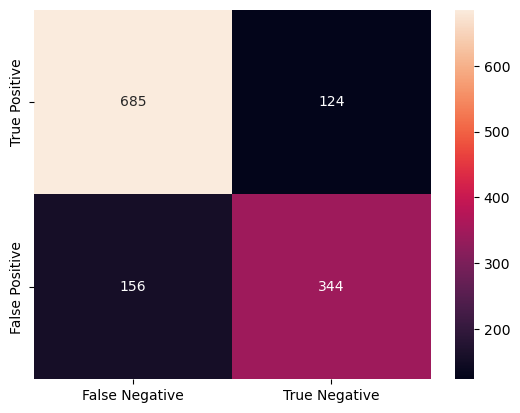

In [410]:
# Get the predicted survival rate from the model
titanic_predicted_y = round(titanic_model.predict(sm.add_constant(titanic_X)))

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(titanic_y, titanic_predicted_y)
sns.heatmap(confusion_matrix,
            annot=True,
            fmt='g',
            xticklabels = ['False Negative', 'True Negative'],
            yticklabels = ['True Positive', 'False Positive'])

In [402]:
true_positive_count = confusion_matrix[0][0]
true_negative_count = confusion_matrix[1][1]

accuracy = (true_positive_count + true_negative_count) / confusion_matrix.sum()
round(accuracy, 4) * 100
print(f"The accuracy of the confusion matrix is {accuracy}")
print(f"The accuracy of the confusion matrix as a percentage is {round(accuracy, 4) * 100}%")

The accuracy of the confusion matrix is 0.786096256684492
The accuracy of the confusion matrix as a percentage is 78.61%


According to the confusion matrix, the model has an accuracy of 0.7861. We can conclude that the model correctly interpreted about 78.61% of the instances